In [2]:
%pip install holoviews

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [4]:
import re
import requests
import pandas as pd
import holoviews as hv
import networkx as nx
from holoviews import opts
from bs4 import BeautifulSoup
from urllib.request import urljoin


In [5]:
sites = "https://www.google.com/" #@param {type:"string"}
depth = 3 #@param {type:"slider", min:1, max:10, step:1}
max_child = 10 #@param {type:"slider", min:1, max:100, step:1}

def crawl(sites, depth=1, current_depth=0, max_child=10):
    get_links = lambda site: pd.Series(urljoin(site, tag.get('href')) for tag in BeautifulSoup(requests.get(site).text).find_all('a')).drop_duplicates().head(max_child)
    
    sites = pd.concat([sites,pd.DataFrame([{'link': link, 'parent': site, 'depth': current_depth + 1}
                                       for site in sites[sites.depth == current_depth].link
                                       for link in get_links(site)])], 
                         ignore_index=True).drop_duplicates('link')
    
    if depth > current_depth + 1:
        return crawl(sites, depth=depth, current_depth=current_depth+1, max_child=max_child)
    else:
        return sites


result = crawl(sites=pd.DataFrame([{'link': site, 'depth': 0, 'parent': site} for site in sites.split()]), 
               max_child=max_child,
               depth=depth)

In [6]:
result

,link,depth,parent
0,https://www.google.com/,0,https://www.google.com/
1,https://www.google.com/imghp?hl=km&tab=wi,1,https://www.google.com/
2,https://maps.google.com.kh/maps?hl=km&tab=wl,1,https://www.google.com/
3,https://play.google.com/?hl=km&tab=w8,1,https://www.google.com/
4,https://news.google.com/?tab=wn,1,https://www.google.com/
...,...,...,...
538,https://support.google.com/websearch/?hl=en,3,https://support.google.com/websearch/?p=displa...
539,https://support.google.com/websearch/community...,3,https://support.google.com/websearch/?p=displa...
542,https://support.google.com/websearch/?p=result...,3,https://support.google.com/websearch/?p=result...
546,https://accounts.google.com/ServiceLogin?hl=en...,3,https://support.google.com/websearch/?p=result...


In [7]:
# this is just the example scenarios
# from the results you can see the links "https://support.google.com/websearch", "https://play.google.com"
# it could be the all services google site

In [8]:
#Task : write the regular expression to get all the services of google

In [9]:
import re
text_series = result['link']
google_services_pattern = r'https://[^\s]+google\.com'
google_services = []
for text in text_series:
    matches = re.findall(google_services_pattern, str(text))  
    google_services.extend(matches)
for services in google_services:
    print(services)

https://www.google.com
https://www.google.com
https://maps.google.com
https://play.google.com
https://news.google.com
https://mail.google.com
https://drive.google.com
https://calendar.google.com
https://www.google.com
https://www.google.com
https://www.google.com
https://maps.google.com
https://play.google.com
https://news.google.com
https://mail.google.com
https://drive.google.com
https://calendar.google.com
https://www.google.com
https://support.google.com
https://play.google.com
https://policies.google.com
https://myaccount.google.com
https://play.google.com
https://play.google.com
https://play.google.com
https://play.google.com
https://play.google.com
https://play.google.com
https://play.google.com
https://news.google.com
https://www.google.com
https://accounts.google.com/ServiceLogin?passive=1209600&continue=https://news.google.com/home?tab%3Dwn%26hl%3Den-US%26gl%3DUS%26ceid%3DUS:en&followup=https://news.google.com
https://news.google.com
https://news.google.com
https://news.googl

In [32]:
#Task : Visualize the services : - how many services that google have? 

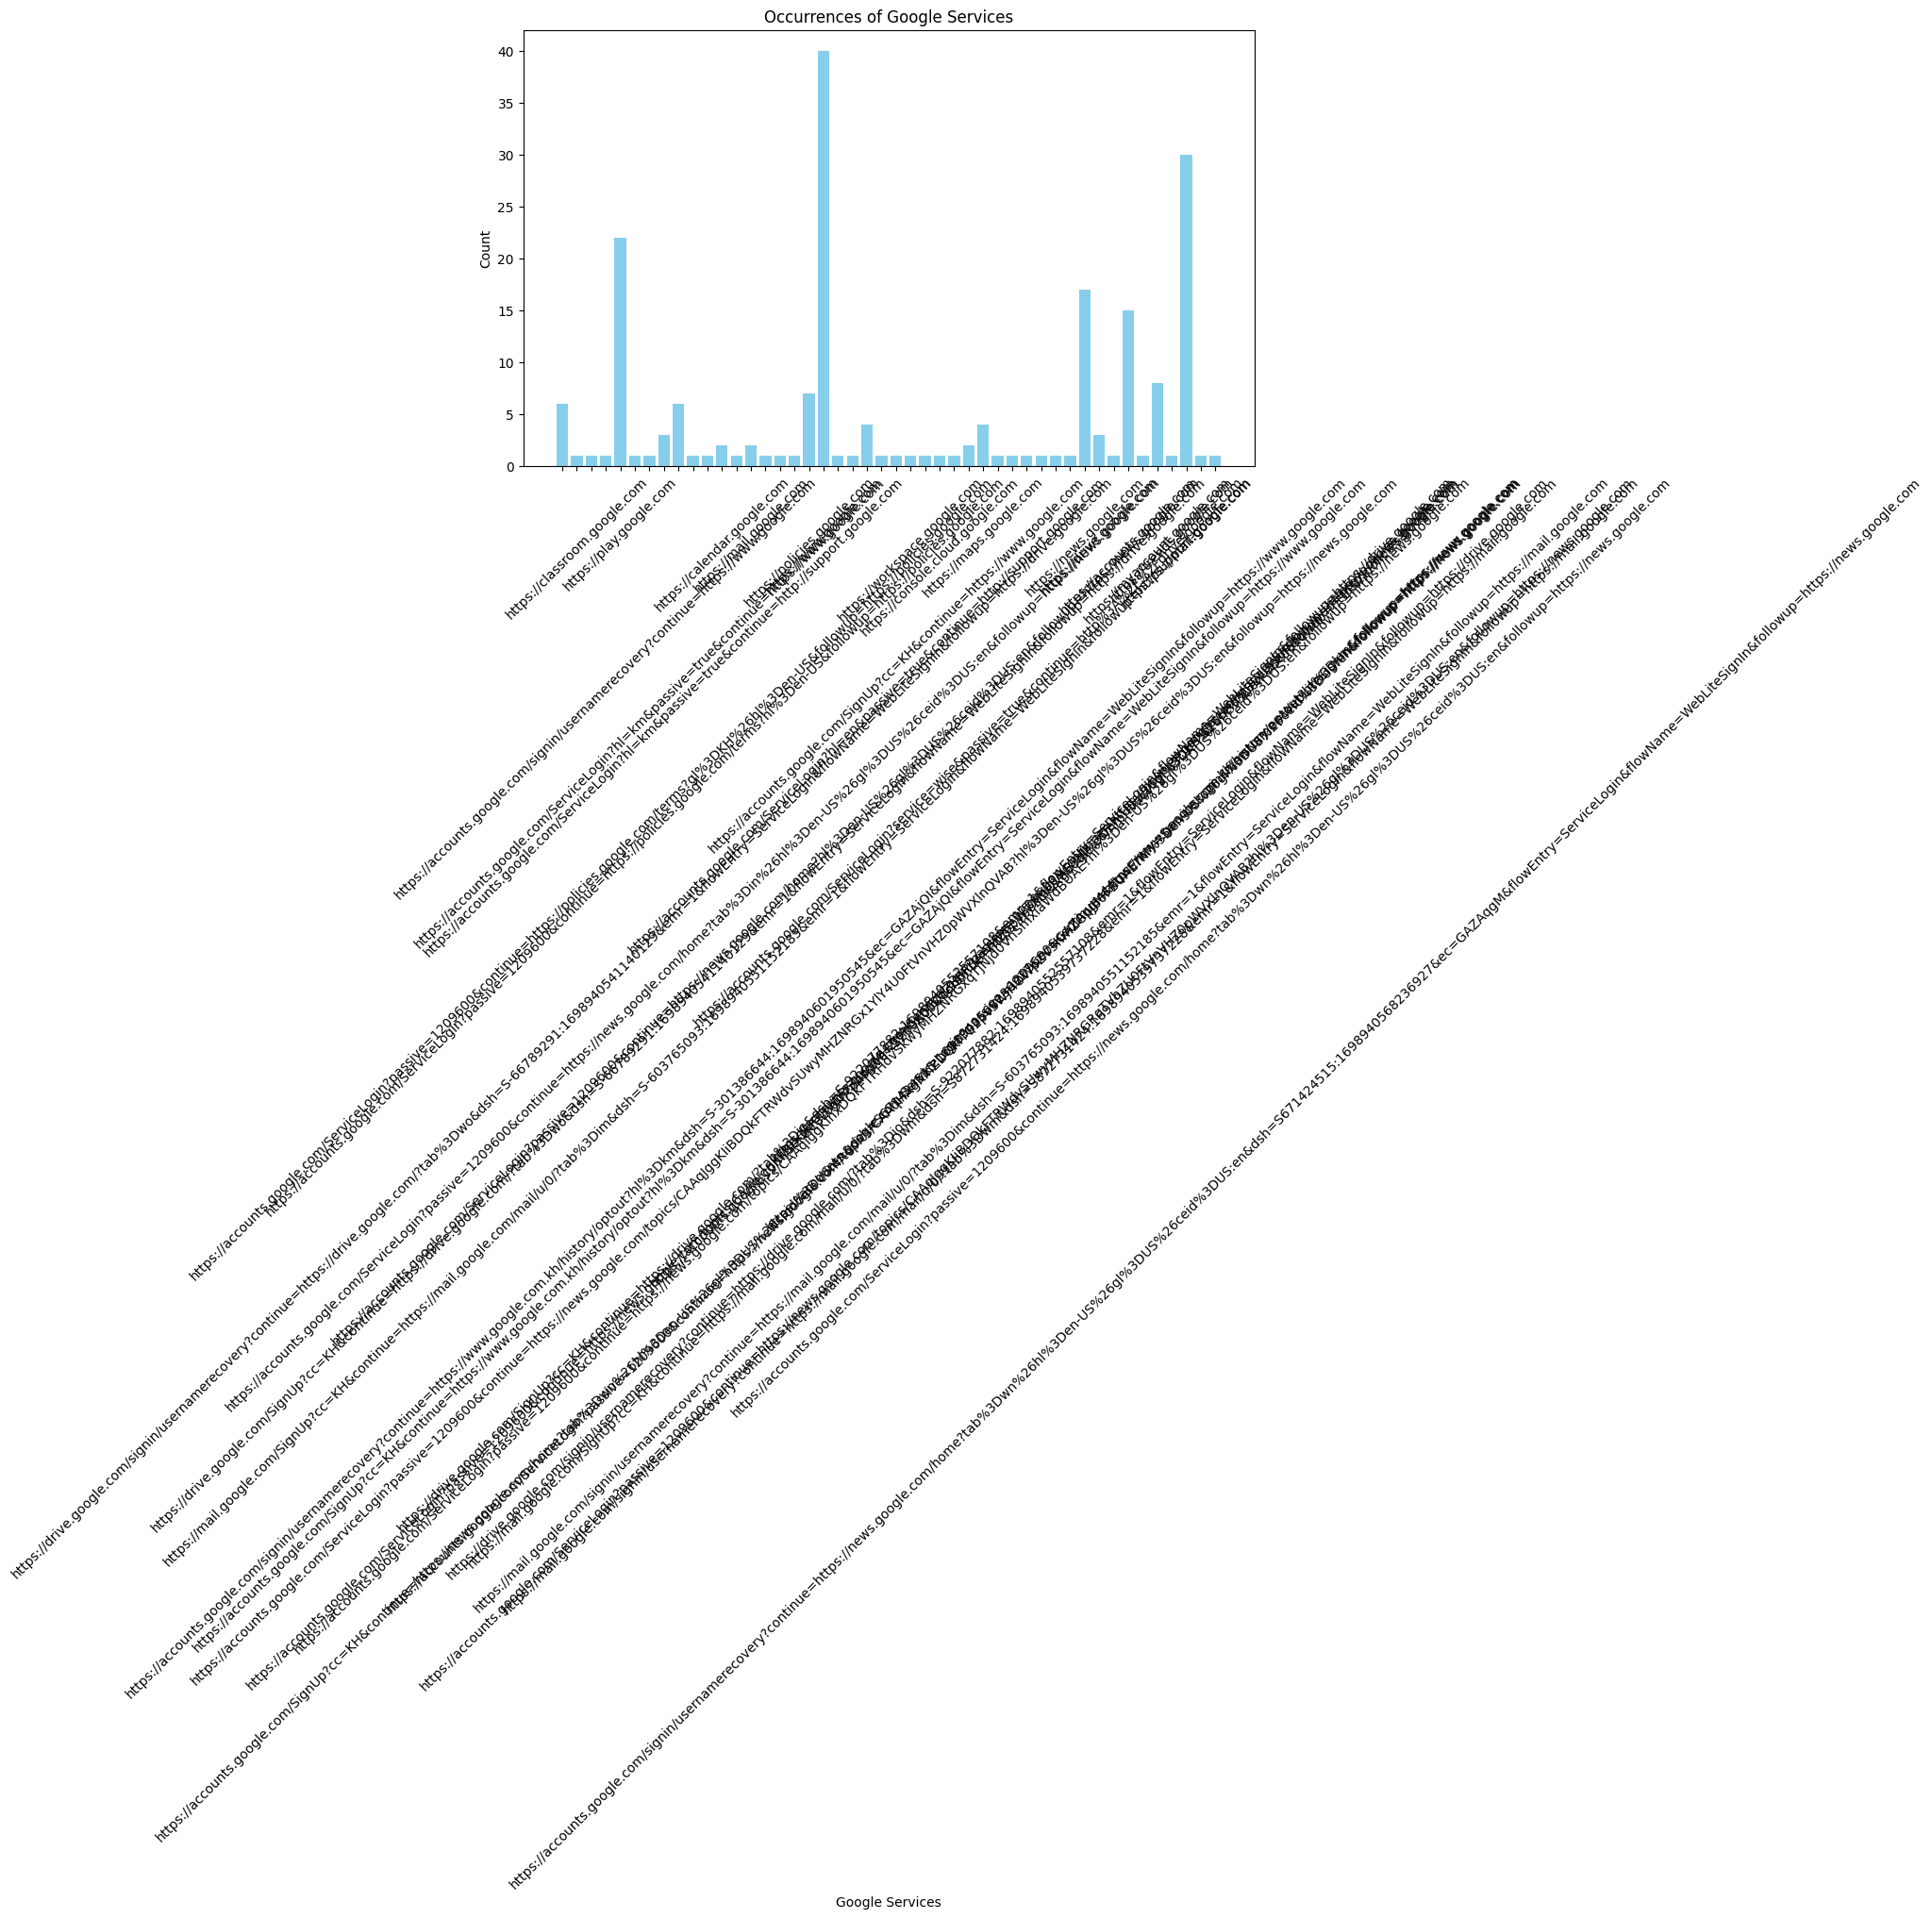

In [34]:
import matplotlib
#matplotlib.use('TkAgg')  # Change the backend to 'TkAgg'
import matplotlib.pyplot as plt

# Plot the occurrences of Google services
unique_services = list(set(google_services))
service_counts = [google_services.count(service) for service in unique_services]

plt.figure(figsize=(10, 6))
plt.bar(unique_services, service_counts, color='skyblue')
plt.xlabel('Google Services')
plt.ylabel('Count')
plt.title('Occurrences of Google Services')
plt.xticks(rotation=45)
plt.show()